# Data Wrangling Template

## Gather

In [410]:
import pandas as pd
import zipfile as zf
import numpy as np
# Load the data

with zf.ZipFile('archive.zip', 'r') as myzip:
    myzip.extractall()

df = pd.read_csv('online-job-postings.csv')

## Assess

In [411]:
# Visual Assessment
print(df.head())
# Programmatic Assessment
df.info()
print(df.describe())

print(df.nunique())

print(df.Year.value_counts())

                                             jobpost          date  \
0  AMERIA Investment Consulting Company\r\nJOB TI...   Jan 5, 2004   
1  International Research & Exchanges Board (IREX...   Jan 7, 2004   
2  Caucasus Environmental NGO Network (CENN)\r\nJ...   Jan 7, 2004   
3  Manoff Group\r\nJOB TITLE:  BCC Specialist\r\n...   Jan 7, 2004   
4  Yerevan Brandy Company\r\nJOB TITLE:  Software...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   
2        Cauca

Problems
1. Missing values (NaN)
2. Some columns have duplicate information (date vs year and month columns)
3. Nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)
4. StartDate inconsistencies (ASAP)


## Clean

In [412]:
df_clean = df.copy()

### Issue 1

#### Define

Define Cleaning Plan
1. Nothing, but note for programming later!  
2. Nothing for now otherwise I could do .string.replace() or .drop()
3. **Select all nondescriptive and misspelled column headers (JobRequirment, RequiredQual, ApplicationP, AboutC) Replace Column names with Full Words (JobRequirement, RequiredQualifications, ApplicationProcedure, AboutCompany)**

4. Select all records with ASAP, Immediately, or other like phrases and replace with 'ASAP'


#### Code

3. Select all nondescriptive and misspelled column headers (JobRequirment, RequiredQual, ApplicationP, AboutC) Replace Column names with Full Words (JobRequirement, RequiredQualifications, ApplicationProcedure, AboutCompany)


In [413]:
df_clean.columns


Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [414]:

df_clean = df_clean.rename(columns={'JobRequirment':'JobRequirement', \
                                    'ApplicationP': 'ApplicationProcedure', 'AboutC':'AboutCompany', \
                                    'RequiredQual':'RequiredQualifications'})


#### Test

In [415]:
df_clean.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirement', 'RequiredQualifications', 'Salary',
       'ApplicationProcedure', 'OpeningDate', 'Deadline', 'Notes',
       'AboutCompany', 'Attach', 'Year', 'Month', 'IT'],
      dtype='object')

### Issue 2

#### Define

Define Cleaning Plan
1. Nothing, but note for programming later!  
2. Nothing for now otherwise I could do .string.replace() or .drop()
3. Select all nondescriptive and misspelled column headers (JobRequirment, RequiredQual, ApplicationP, AboutC) Replace Column names with Full Words (JobRequirement, RequiredQualifications, ApplicationProcedure, AboutCompany)
4. **Select all records with ASAP, Immediately, or other like phrases and replace with 'ASAP'**


#### Code

4. **Select all records with ASAP, Immediately, or other like phrases in the StartDate column and replace with 'ASAP'**


In [416]:
df_clean.StartDate.value_counts()

ASAP                              4754
Immediately                        773
As soon as possible                543
Upon hiring                        261
Immediate                          259
                                  ... 
Flexible                             1
11 April 2010                        1
ASAP starting 10 February 2006       1
07 April 2010                        1
15 March 2009                        1
Name: StartDate, Length: 1186, dtype: int64

In [417]:
set1 = set(df_clean.StartDate[df_clean.StartDate.str.lower().str.contains('as').astype(bool)])

set1

{'01 April 2014 or ASAP',
 '01 September 2014 or ASAP',
 '12 November 2012 or ASAP',
 '15 April 2013 or ASAP',
 '20 November 2014 or ASAP',
 'ASA',
 'ASAP',
 'ASAP preferred',
 'ASAP starting 10 February 2006',
 'ASAP with 3 months probation period.',
 'Anticipated starting date of the assignment is March\r\n2008.',
 'Applicants must be able to start no later than July\r\n19, 2004. Position to be filled as soon as possible; will remain open\r\nuntil filled',
 'April 2005 or as agreed',
 'April 2014 or ASAP',
 'As agreed with the trainer',
 'As soon as Possible',
 'As soon as posible',
 'As soon as possible',
 'As soon as possible.',
 'As soon as practical',
 'As soon as the shop opens',
 'Asap',
 'December 2008 (we are planning to conduct the\r\ntrainings on Christmas days/ 24-25 December)',
 'February 2005 or as agreed.',
 'Immediate employment after passing the interview',
 'Immediate employment, after passing the interview.',
 'Immediately or as per agreement',
 'June 2005 or as agr

In [418]:
set2 = set(df_clean.StartDate[df_clean.StartDate.str.lower().str.contains('im').astype(bool)])

set2


{'Approximate start date is 25 January 2007',
 'Approximately 06 February 2012',
 'Approximately 15 February 2012',
 'Approximately September 2008 and position is subject\r\nto ACDI/VOCA being awarded the activity.',
 'Estimated start date of employment 2nd Quarter 2004',
 'Full time',
 'Fulll-time',
 'Imediately',
 'Immadiate',
 'Immediate',
 'Immediate employment',
 'Immediate employment after passing the interview',
 'Immediate employment opportunity',
 'Immediate employment opportunity.',
 'Immediate employment, after passing the interview.',
 'Immediate employment.',
 'Immediate hire',
 'Immediate hiring',
 'Immediate job opening',
 'Immediate job opportunity',
 'Immediate or earliest possible',
 'Immediatelly',
 'Immediately',
 'Immediately or as per agreement',
 'Immediately upon agreement',
 'Immediately upon selection or no later than November\r\n15, 2009.',
 'Immediately upon selection, latest July 1, 2007',
 'Immediately with 2 months probation period',
 'Immediately/ upon a

In [419]:
set4 = set(df_clean.StartDate[df_clean.StartDate.str.lower().str.contains('ear').astype(bool)])

set4

{'01 March 2005 or earlier if possible',
 '01 October 2005 or earlier',
 '1 December 2010 or earlier',
 'Earliest  possible',
 'Early 2006',
 'Early August 2004',
 'Early December',
 'Immediate or earliest possible',
 'In the near future',
 'Preferably early-November 2013',
 'The position is open immediately but has a flexible\r\nstart date depending on the candidates earliest availability.',
 'in the nearest future',
 nan}

In [420]:
all_sets = set1 | set2

all_sets = all_sets - {'Anticipated starting date of the assignment is March\r\n2008.', 'Approximate start date is 25 January 2007',
 'Approximately 06 February 2012',
 'Approximately 15 February 2012',
 'Approximately September 2008 and position is subject\r\nto ACDI/VOCA being awarded the activity.',  'As agreed with the trainer',
 'December 2008 (we are planning to conduct the\r\ntrainings on Christmas days/ 24-25 December)',
 'Estimated start date of employment 2nd Quarter 2004',
 'February 2005 or as agreed.',
 'Full time',
 'Fulll-time','June 2005 or as agreed',
 'May 2005 or as agreed.',
 'November 2005 or as agreed.',  'Successful applicants will be periodically employed \r\nduring the next 24 months, depending on the need, as part of the DePo\r\nprogram funded by USAID.',
 'Tentative time: Spring 2005',
 'The assignment will commence on October 1, 2004.',
 'The expected start time is October 2007',
 'When-actually-employed basis.',  'April 2014 or ASAP',  'As soon as the shop opens',  'April 2005 or as agreed'}

all_sets


{'01 April 2014 or ASAP',
 '01 September 2014 or ASAP',
 '12 November 2012 or ASAP',
 '15 April 2013 or ASAP',
 '20 November 2014 or ASAP',
 'ASA',
 'ASAP',
 'ASAP preferred',
 'ASAP starting 10 February 2006',
 'ASAP with 3 months probation period.',
 'Applicants must be able to start no later than July\r\n19, 2004. Position to be filled as soon as possible; will remain open\r\nuntil filled',
 'As soon as Possible',
 'As soon as posible',
 'As soon as possible',
 'As soon as possible.',
 'As soon as practical',
 'Asap',
 'Earliest  possible',
 'Imediately',
 'Immadiate',
 'Immediate',
 'Immediate employment',
 'Immediate employment after passing the interview',
 'Immediate employment opportunity',
 'Immediate employment opportunity.',
 'Immediate employment, after passing the interview.',
 'Immediate employment.',
 'Immediate hire',
 'Immediate hiring',
 'Immediate job opening',
 'Immediate job opportunity',
 'Immediate or earliest possible',
 'Immediatelly',
 'Immediately',
 'Immedia

In [421]:
old_asap = {'Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately'}

In [423]:
all_sets = all_sets | old_asap

# remove nan value in set
all_sets = all_sets - {np.nan, 'ASAP'}

all_sets

{'"Immediate employment, after passing the interview."',
 '"Immediately upon selection or no later than November 15, 2009."',
 '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
 '01 April 2014 or ASAP',
 '01 September 2014 or ASAP',
 '12 November 2012 or ASAP',
 '15 April 2013 or ASAP',
 '20 November 2014 or ASAP',
 'ASA',
 'ASAP preferred',
 'ASAP starting 10 February 2006',
 'ASAP with 3 months probation period.',
 'Applicants must be able to start no later than July\r\n19, 2004. Position to be filled as soon as possible; will remain open\r\nuntil filled',
 'As soon as Possible',
 'As soon as posible',
 'As soon as possible',
 'As soon as possible.',
 'As soon as practical',
 'Asap',
 'Earliest  possible',
 'Employment contract signature date',
 'Imediately',
 'Immadiate',
 'Immediate',
 'Immediate employment',
 'Immediate employment after passing the interview',
 'Immediate employment opportunity',
 'Immediate empl

In [424]:
for old in all_sets:
    df_clean.StartDate.replace(to_replace=old, value='ASAP', inplace=True)
    


#### Test

In [425]:
df_clean.StartDate.value_counts()

ASAP                       6876
01 September 2012            31
March 2006                   27
November 2006                22
January 2010                 19
                           ... 
11 April 2010                 1
Beginning of March 2006       1
07 April 2010                 1
3-21 July 2006                1
25 March 2009                 1
Name: StartDate, Length: 1133, dtype: int64

In [427]:
for old in all_sets:
    assert old not in df_clean.StartDate.values


## Analysis and Visualization

<AxesSubplot:ylabel='StartDate'>

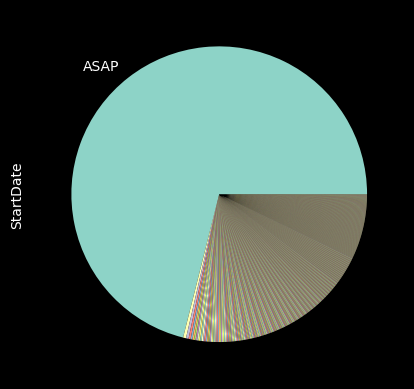

In [428]:
%matplotlib inline
labels = np.full(len(df_clean.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df_clean.StartDate.value_counts().plot(kind="pie", labels=labels)
